Centrality Measures

In [1]:
import pandas as pd
import networkx as nx

from stock_graph_creation import correlation_to_graph
from stock_graph_creation import get_sp500_stocks
from stock_graph_creation import get_sp500_stocks_info
from utils import rolling_time_windows
from utils import compute_degree_centrality
from utils import compute_centralities_over_time
from utils import compute_node_degree_centrality

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'leidenalg', 'infomap', 'bayanpy', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'leidenalg'}


CRISIS ANALYSIS:

In a crisis, it's often observable:

    - Higher correlations across the board (markets move together)
    
    - More densely connected graphs

    - Certain nodes (stocks) becoming disproportionately central (systemic importance)

    - Collapse of clear community/sector structures



Stock Market during COVID-19 pandemic

In [2]:
df_covid = get_sp500_stocks("2020-01-01", "2020-06-01")
windows = rolling_time_windows("2020-01-01", "2020-06-01", window_size_days=15, step_days=7)
centrality_df_covid = compute_centralities_over_time(df_covid, windows, threshold=0.7)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  502 of 502 completed

13 Failed downloads:
['CEG', 'DASH', 'GEHC', 'SOLV', 'ABNB', 'KVUE', 'SW', 'VLTO', 'PLTR', 'EXE', 'GEV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-06-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1590984000")')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-06-01)')


<Axes: title={'center': 'Amazon stock during Covid pandemic'}, xlabel='Date'>

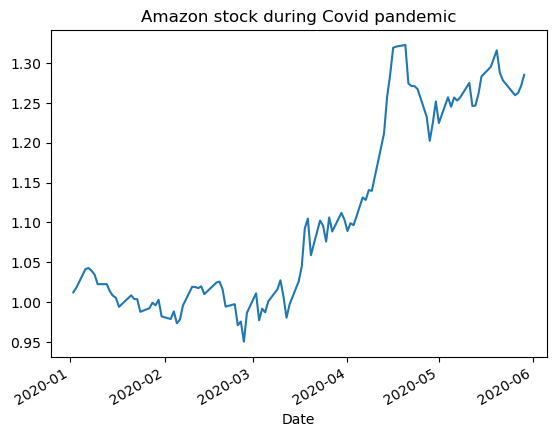

In [10]:
(df_covid['AMZN']).cumprod().plot(title="Amazon stock during Covid pandemic")

During the COVID-19 pandemic, Amazon's stock experienced significant growth due to a surge in demand for online shopping and cloud computing services. As lockdowns and social distancing measures were implemented worldwide, consumers increasingly turned to e-commerce platforms for essential goods, household items, and entertainment. Amazon, being one of the largest and most reliable online retailers, was well-positioned to meet this demand. Additionally, the company’s cloud division, Amazon Web Services (AWS), saw increased usage as businesses shifted to remote work and digital operations. These factors contributed to strong revenue growth and investor confidence, driving up Amazon’s stock price during the pandemic.










In [ ]:
windows = df_covid.index[::7] 
degree_centrality_vals = compute_degree_centrality(df_covid, list(windows), threshold=0.7)


[nan, 0.15616734690428508, 0.21323970559653885, 0.3207848505589779, 0.1482918008129051, 0.11257298822893166, 0.4940806651963395, 0.2943358599302017, 0.2771482410998724, 0.20980421737235577, 0.3673019544738342, 0.13802842871031545, 0.1971403667571826, 0.3294846332514222, 0.20074424218042844]


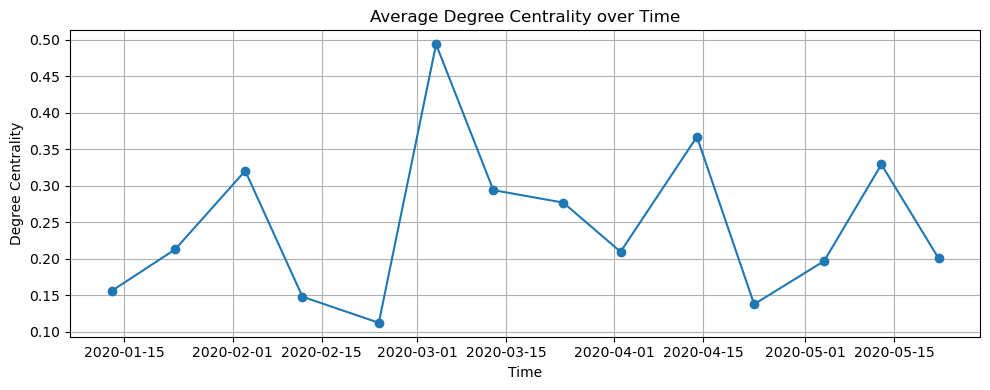

In [13]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame({
    'week_ending': list(windows)[:len(degree_centrality_vals)],
    'degree_centrality': degree_centrality_vals
})

plt.figure(figsize=(10, 4))
plt.plot(results_df['week_ending'], results_df['degree_centrality'], marker='o')
plt.title('Average Degree Centrality over Time')
plt.xlabel('Time')
plt.ylabel('Degree Centrality')
plt.grid(True)
plt.tight_layout()
plt.show()

The graph shows a sharp peak in average degree centrality occurring immediately after the outbreak of COVID-19 in early March 2020. This sudden increase reflects a moment of heightened correlation and interconnectedness among companies in the network, likely driven by a global wave of uncertainty and market turbulence. As the pandemic rapidly spread and governments began implementing lockdowns and emergency measures, investors reacted strongly and often uniformly across sectors. This collective behavior caused stock movements to become more synchronized, leading to higher degrees of co-movement and, consequently, a spike in degree centrality. Such a surge indicates that, during periods of systemic stress, financial networks tend to become more tightly connected, as the actions of market participants converge in response to widespread external shocks.


In [5]:
print(centrality_df_covid)

          Date   Density  Avg_Degree  Clustering  Num_Components  \
0   2020-01-16  0.032517   16.290837    0.337409              17   
1   2020-01-23  0.027896   13.976096    0.292935              17   
2   2020-01-30  0.056699   28.406375    0.361914              18   
3   2020-02-06  0.052803   26.454183    0.391319              20   
4   2020-02-13  0.041065   20.573705    0.358429              18   
5   2020-02-20  0.026107   13.079681    0.298149              17   
6   2020-02-27  0.206829  103.621514    0.581240              19   
7   2020-03-05  0.325230  162.940239    0.674120              18   
8   2020-03-12  0.188317   94.346614    0.561987              16   
9   2020-03-19  0.079315   39.737052    0.450121              21   
10  2020-03-26  0.095848   48.019920    0.452133              18   
11  2020-04-02  0.109534   54.876494    0.484537              15   
12  2020-04-09  0.125629   62.940239    0.492691              19   
13  2020-04-16  0.142027   71.155378    0.507720

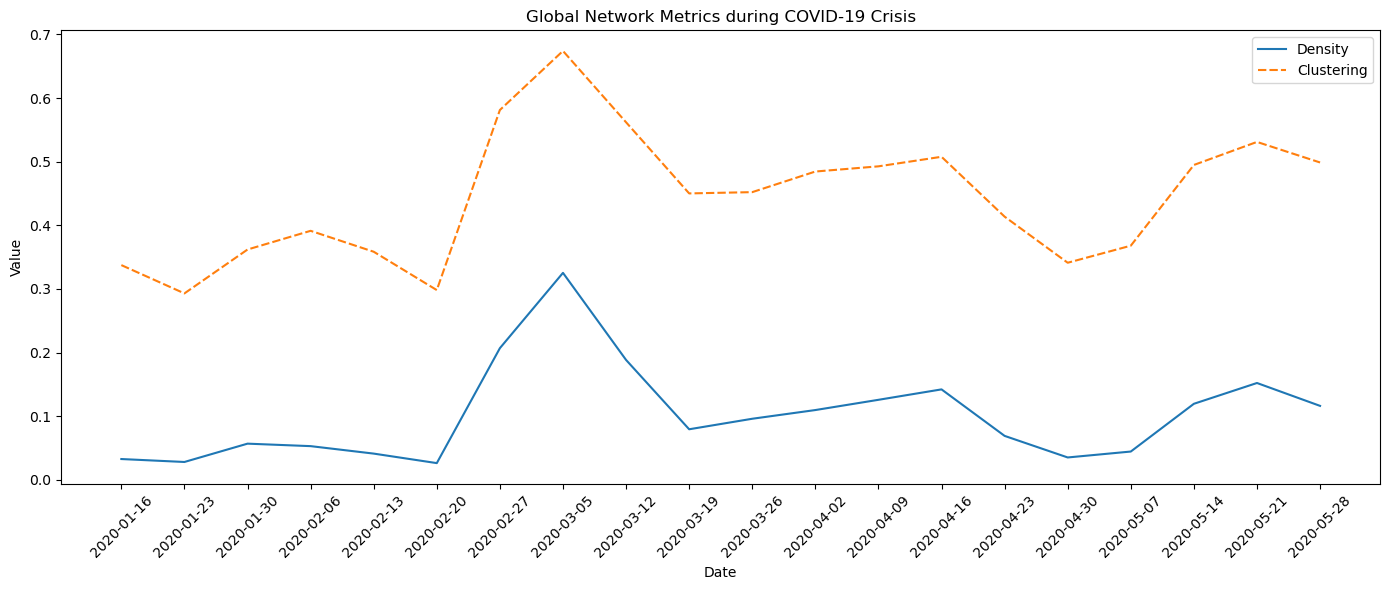

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=centrality_df_covid.set_index("Date")[["Density", "Clustering"]])
plt.title("Global Network Metrics during COVID-19 Crisis") 
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

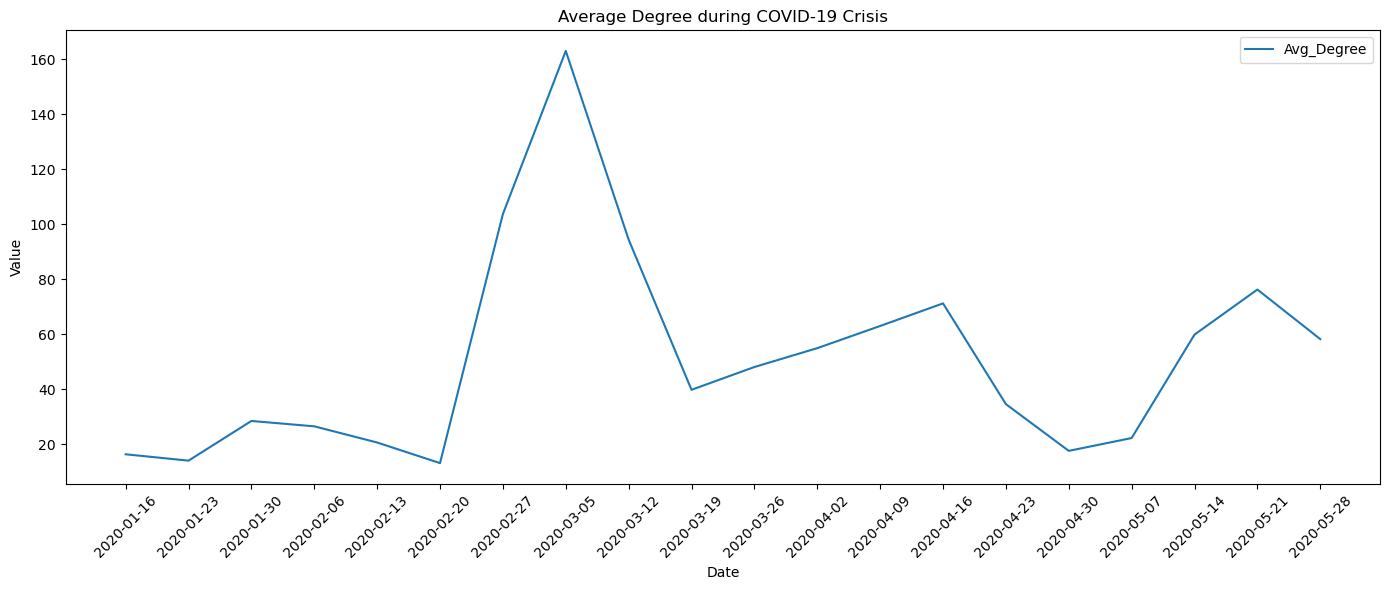

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=centrality_df_covid.set_index("Date")[["Avg_Degree"]])
plt.title("Average Degree during COVID-19 Crisis") 
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(df_covid)


Ticker             A      AAPL      ABBV  ABNB       ABT      ACGL       ACN  \
Date                                                                           
2020-01-02  1.000582  1.013874  1.005276   NaN  1.010342  1.009068  0.996633   
2020-01-03  0.998819  1.000942  1.006011   NaN  1.001633  1.004402  1.006235   
2020-01-06  1.009762  1.020457  1.013376   NaN  1.008409  1.002303  1.000768   
2020-01-07  1.013340  0.995164  0.999550   NaN  1.001049  0.990135  1.003592   
2020-01-08  0.999535  1.020292  1.004150   NaN  0.999652  0.990955  1.001618   
...              ...       ...       ...   ...       ...       ...       ...   
2020-05-22  0.999765  1.009881  0.991709   NaN  1.011613  1.019085  0.998094   
2020-05-26  0.998840  0.979073  0.970680   NaN  0.962668  0.987899  0.984856   
2020-05-27  0.998609  1.006231  0.993815   NaN  1.016577  0.980984  1.007813   
2020-05-28  0.997928  1.004672  0.990756   NaN  1.001631  0.961271  1.008300   
2020-05-29  1.011128  0.995897  1.018352

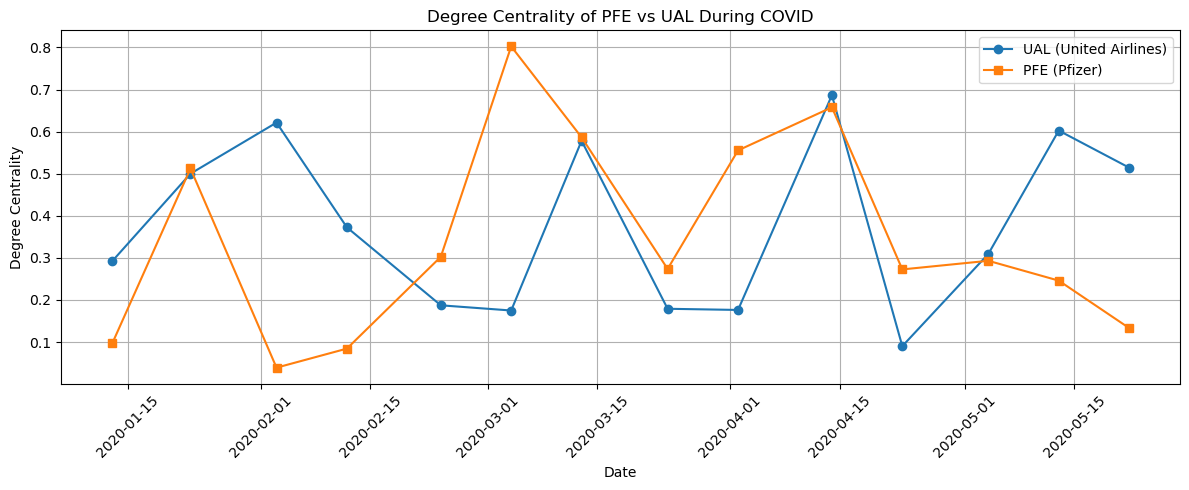

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

weekly_dates = df_covid.index[::7]
node_centralities = compute_node_degree_centrality(df_covid, weekly_dates, threshold=0.5)

plt.figure(figsize=(12, 5))
plt.plot(weekly_dates, node_centralities["UAL"], label="UAL (United Airlines)", marker='o')
plt.plot(weekly_dates, node_centralities["PFE"], label="PFE (Pfizer)", marker='s')
plt.title("Degree Centrality of PFE vs UAL During COVID")
plt.ylabel("Degree Centrality")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The graph illustrates the evolution of degree centrality for United Airlines (UAL) and Pfizer (PFE) during the early months of the COVID-19 pandemic in 2020. Notably, Pfizer shows a sharp spike in centrality around early March, likely reflecting its growing relevance in the pharmaceutical sector as the pandemic unfolded. In contrast, United Airlines displays more volatile behavior, with peaks and troughs that may correspond to fluctuations in the travel industry due to lockdowns and changing public health policies. Overall, Pfizer maintained relatively higher centrality throughout much of the period, highlighting the increased interconnectedness and importance of health-related companies during the crisis.


2008 Financial Crisis

In [2]:
df_2008 = get_sp500_stocks("2008-06-01", "2009-03-01")
windows = rolling_time_windows("2008-06-01", "2009-03-01", window_size_days=15, step_days=7)
centrality_df_2008 = compute_centralities_over_time(df_2008, windows, threshold=0.7)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  502 of 502 completed

80 Failed downloads:
['KKR', 'IR', 'DELL', 'CRWD', 'VLTO', 'GNRC', 'XYL', 'META', 'PAYC', 'FANG', 'EXE', 'ZTS', 'DASH', 'EPAM', 'KEYS', 'GM', 'TRGP', 'DOW', 'PLTR', 'APO', 'ENPH', 'CARR', 'HPE', 'LYB', 'KMI', 'WDAY', 'OTIS', 'HLT', 'IQV', 'FOXA', 'CHTR', 'AVGO', 'DAY', 'AMCR', 'CPAY', 'MRNA', 'GEV', 'FTV', 'PANW', 'GDDY', 'APTV', 'NXPI', 'ANET', 'CBOE', 'GEHC', 'SW', 'SYF', 'VICI', 'MPC', 'UBER', 'CEG', 'VST', 'LW', 'PSX', 'HII', 'NCLH', 'FOX', 'TSLA', 'FTNT', 'ABNB', 'CZR', 'VRSK', 'NOW', 'PYPL', 'CTVA', 'KHC', 'HWM', 'DG', 'CFG', 'NWSA', 'ABBV', 'CDW', 'KVUE', 'INVH', 'ALLE', 'HCA', 'NWS', 'SOLV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2008-06-01 -> 2009-03-01) (Yahoo error = "Data doesn\'t exist for startDate = 1212292800, endDate = 1235883600")')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2008-06-01 -> 2009-03-01)')
['BRK.B']: YFTzMissingError('poss

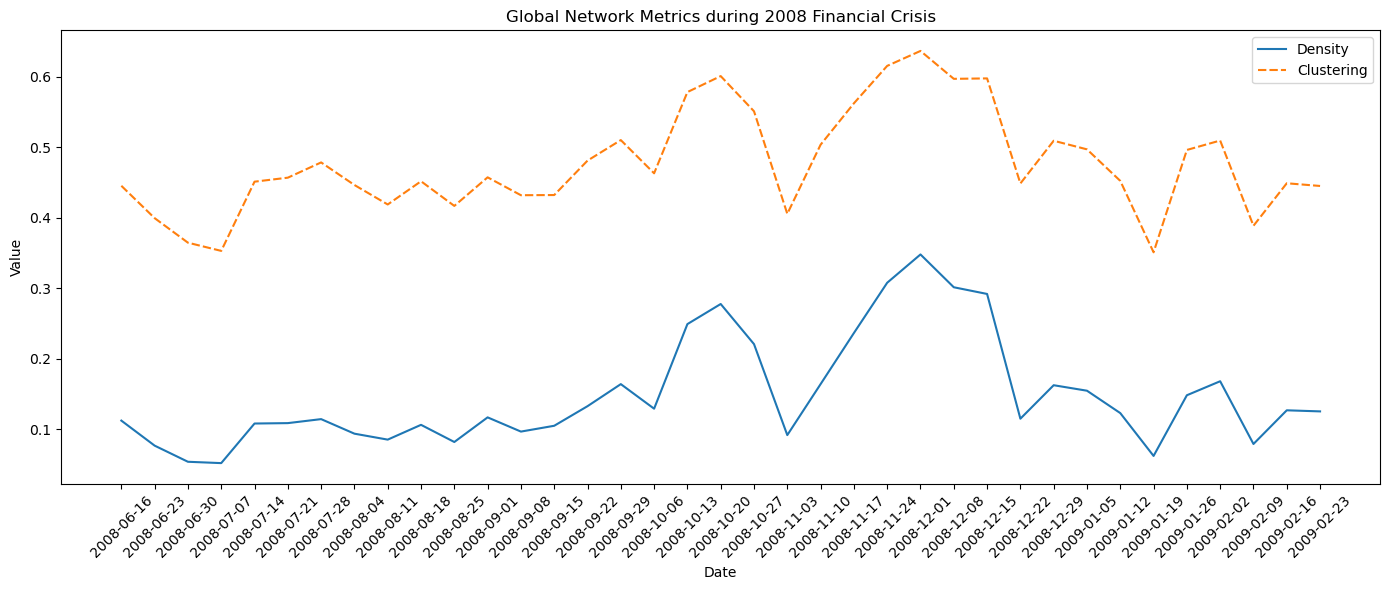

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=centrality_df_2008.set_index("Date")[["Density", "Clustering"]])
plt.title("Global Network Metrics during 2008 Financial Crisis") 
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The network density reflects the overall level of interconnectedness—remains relatively low through the summer months but begins to rise sharply in late September and peaks between mid-October and mid-November. This period coincides with some of the most critical moments of the crisis, including the bankruptcy of Lehman Brothers and several major international interventions. The spike in density suggests that financial entities became significantly more correlated during this time, possibly due to widespread systemic stress and synchronized market behavior.

Russia-Ucraine War

In [25]:
df_war = get_sp500_stocks("2021-12-01", "2022-04-01")
windows = rolling_time_windows("2021-12-01", "2022-04-01", window_size_days=15, step_days=7)
centrality_df_war = compute_centralities_over_time(df_war, windows, threshold=0.7)

[*********************100%***********************]  502 of 502 completed

8 Failed downloads:
['GEV', 'VLTO', 'GEHC', 'KVUE', 'SOLV', 'SW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-01 -> 2022-04-01) (Yahoo error = "Data doesn\'t exist for startDate = 1638334800, endDate = 1648785600")')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-01 -> 2022-04-01)')


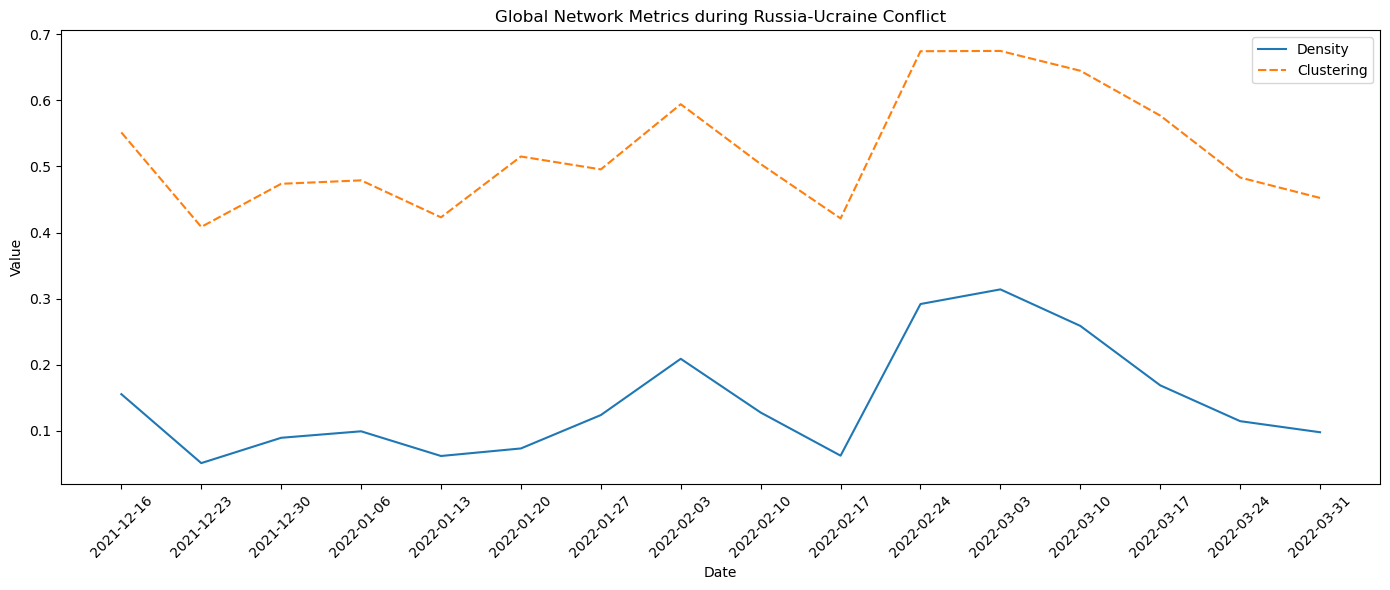

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=centrality_df_war.set_index("Date")[["Density", "Clustering"]])
plt.title("Global Network Metrics during Russia-Ucraine Conflict") 
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

By analyzing different periods of financial crisis, such as the COVID-19 pandemic, the 2008 Financial Crisis and the onset of the Russia-Ukraine war, we observe a consistent pattern in the evolution of network metrics. Specifically, both **graph density** and **average clustering coefficient** show a marked increase during the peak of each crisis. This suggests that, under market stress, stock prices become more correlated, leading to denser and more tightly clustered networks. In other words, companies tend to move more synchronously during uncertain periods, possibly due to systemic reactions to global events or widespread investor behavior. These changes in network structure may serve as early indicators of financial turmoil.
